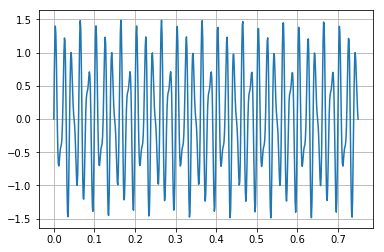

In [1]:
%matplotlib inline

from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt

# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

plt.plot(x, y)
plt.grid()
plt.show()

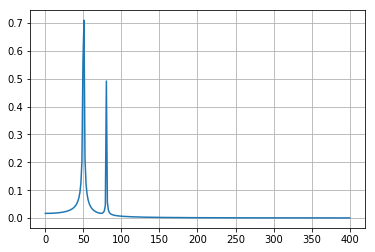

In [2]:
# Transform with fft
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

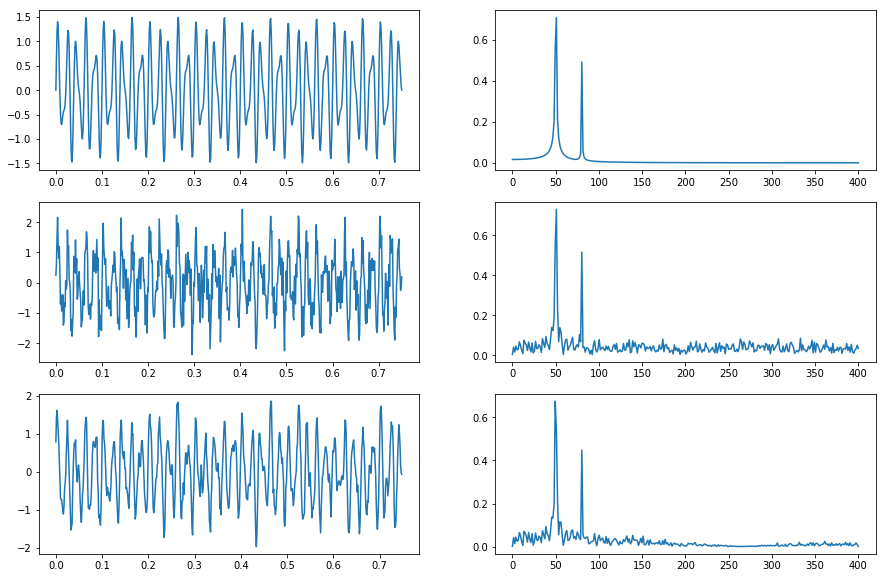

In [3]:
# Add noise, denoise, perform fft, maybe more denoising and transform back (ifft)

# Adding some noise to the data [real life]
np.random.seed(42)
noise = np.random.normal(0, .5, N)
y_noisy = y + noise


# Denoise by moving average. Maybe filtering with low-pass filter after fft is better?
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
window = 3
y_noisy_avg = moving_average(y_noisy, window)


# Computing fft for the different ys
yf = fft(y)
yf_noisy = fft(y_noisy)
yf_noisy_avg = fft(y_noisy_avg)


# Plot results
fig, axarr = plt.subplots(3, 2)
fig.set_size_inches(15, 10)
axarr[0, 0].plot(x, y)
#axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y_noisy)
#axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].plot(xf, 2.0/N * np.abs(yf_noisy[0:N//2]))
#axarr[1, 1].set_title('Axis [1,1]');
axarr[2, 0].plot(x[:-(window-1)], y_noisy_avg)
#axarr[2, 0].set_title('Axis [1,0]')
axarr[2, 1].plot(xf, 2.0/N * np.abs(yf_noisy_avg[0:N//2]));
#axarr[2, 1].set_title('Axis [1,1]');


# ToDo sublots of all plots also include the data from above!

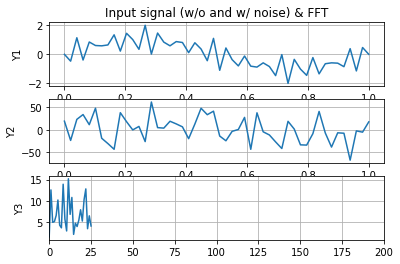

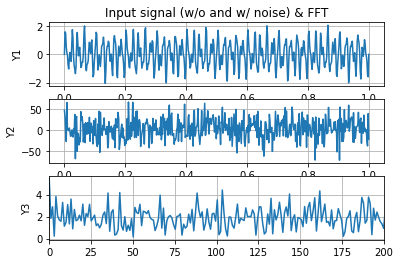

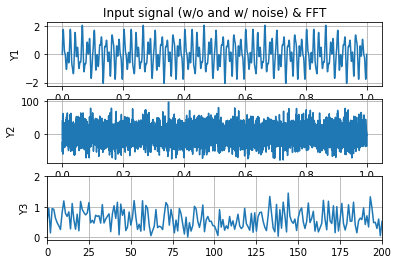

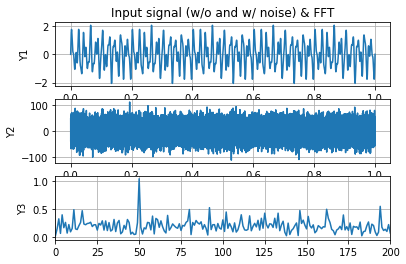

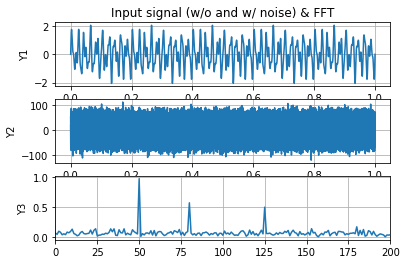

In [4]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for sample_points in [50, 500, 5000, 50000, 500000]: 
    # Number of sample points
    N = sample_points

    # Sample spacing
    T = 1.0 / N

    # Create x values
    x = np.linspace(0.0, N*T, N)

    # Calculate y values based on random addition of sin- and cos-functions
    y = np.sin(50.0 * 2.0*np.pi*x) + \
        0.6*np.sin(80.0 * 2.0*np.pi*x) + \
        0.5*np.sin(100.0 * 2.5*np.pi*x)

    # Adding some noise to the data [real life]
    noise = np.random.normal(0, 25, N)
    y_noisy = y + noise

    # Fourier transform
    yf = fft(y_noisy)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

    # Plot graphs for all, input signal, signal+noise and fft output
    plt.figure(1)
    plt.subplot(311)
    plt.title('Input signal (w/o and w/ noise) & FFT')
    plt.ylabel('Y1')
    plt.plot(x, y)
    plt.grid(True)

    plt.subplot(312)
    plt.ylabel('Y2')
    plt.plot(x, y_noisy)
    plt.grid(True)

    plt.subplot(313)
    plt.ylabel('Y3')
    plt.xlim(0, 200)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid(True)


    plt.show();